<a href="https://colab.research.google.com/github/awmankit/Boston-House-Price-Prediction/blob/main/House1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##**Importing Modules**

In [1]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

##**Loading Dataset**

In [13]:
housing = pd.DataFrame(pd.read_csv("/content/Boston.csv"))
housing.drop(columns=['id'], axis=0, inplace=True)

In [14]:
housing.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [15]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  black    506 non-null    float64
 12  lstat    506 non-null    float64
 13  medv     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [16]:
housing.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


##**Removing Null Values**

In [17]:
housing.isnull().sum()*100/housing.shape[0]

,0
crim,0.0
zn,0.0
indus,0.0
chas,0.0
nox,0.0
rm,0.0
age,0.0
dis,0.0
rad,0.0
tax,0.0


##**BoxPlots**

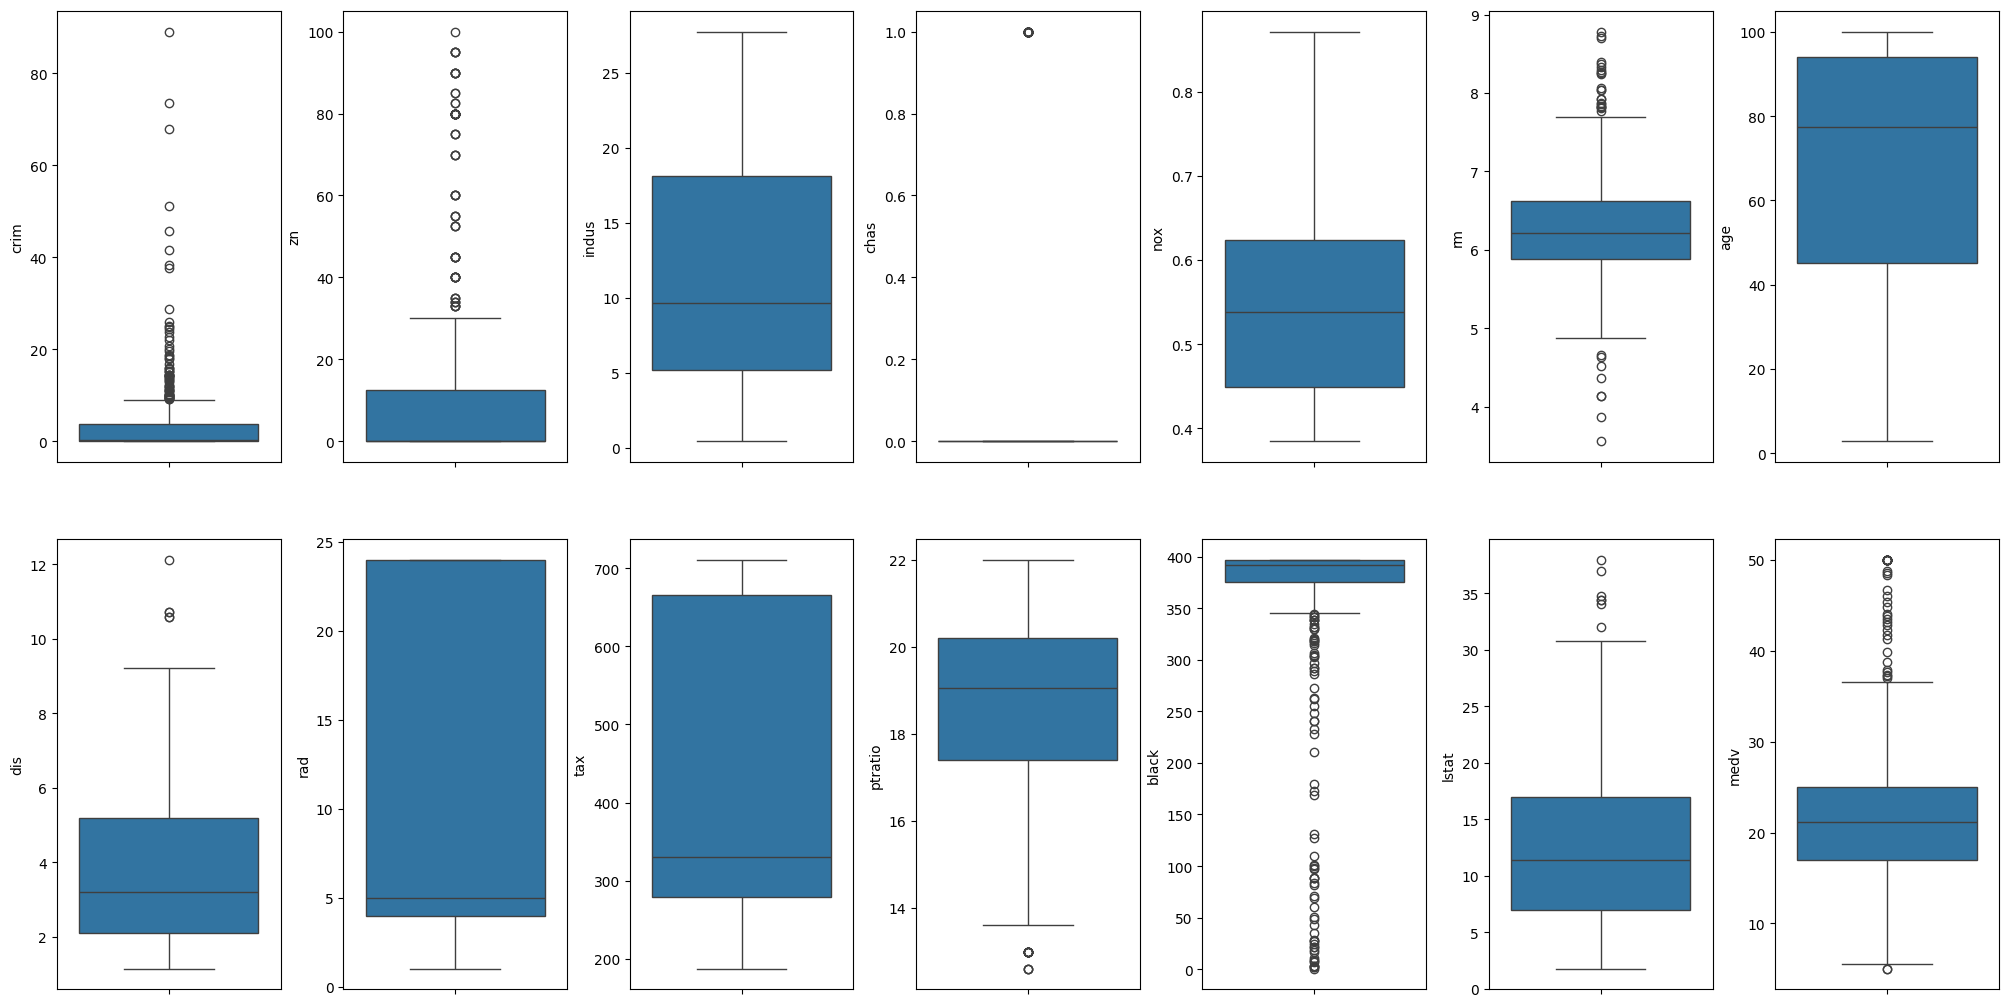

In [18]:
fig, ax = plt.subplots(ncols=7, nrows = 2, figsize = (20,10))
index = 0
ax = ax.flatten()

for col, value in housing.items():
    sns.boxplot(y = col, data = housing, ax = ax[index])
    index += 1

plt.tight_layout(pad = 0.4, w_pad = 0.5, h_pad = 5.0)

##**DistPlots**

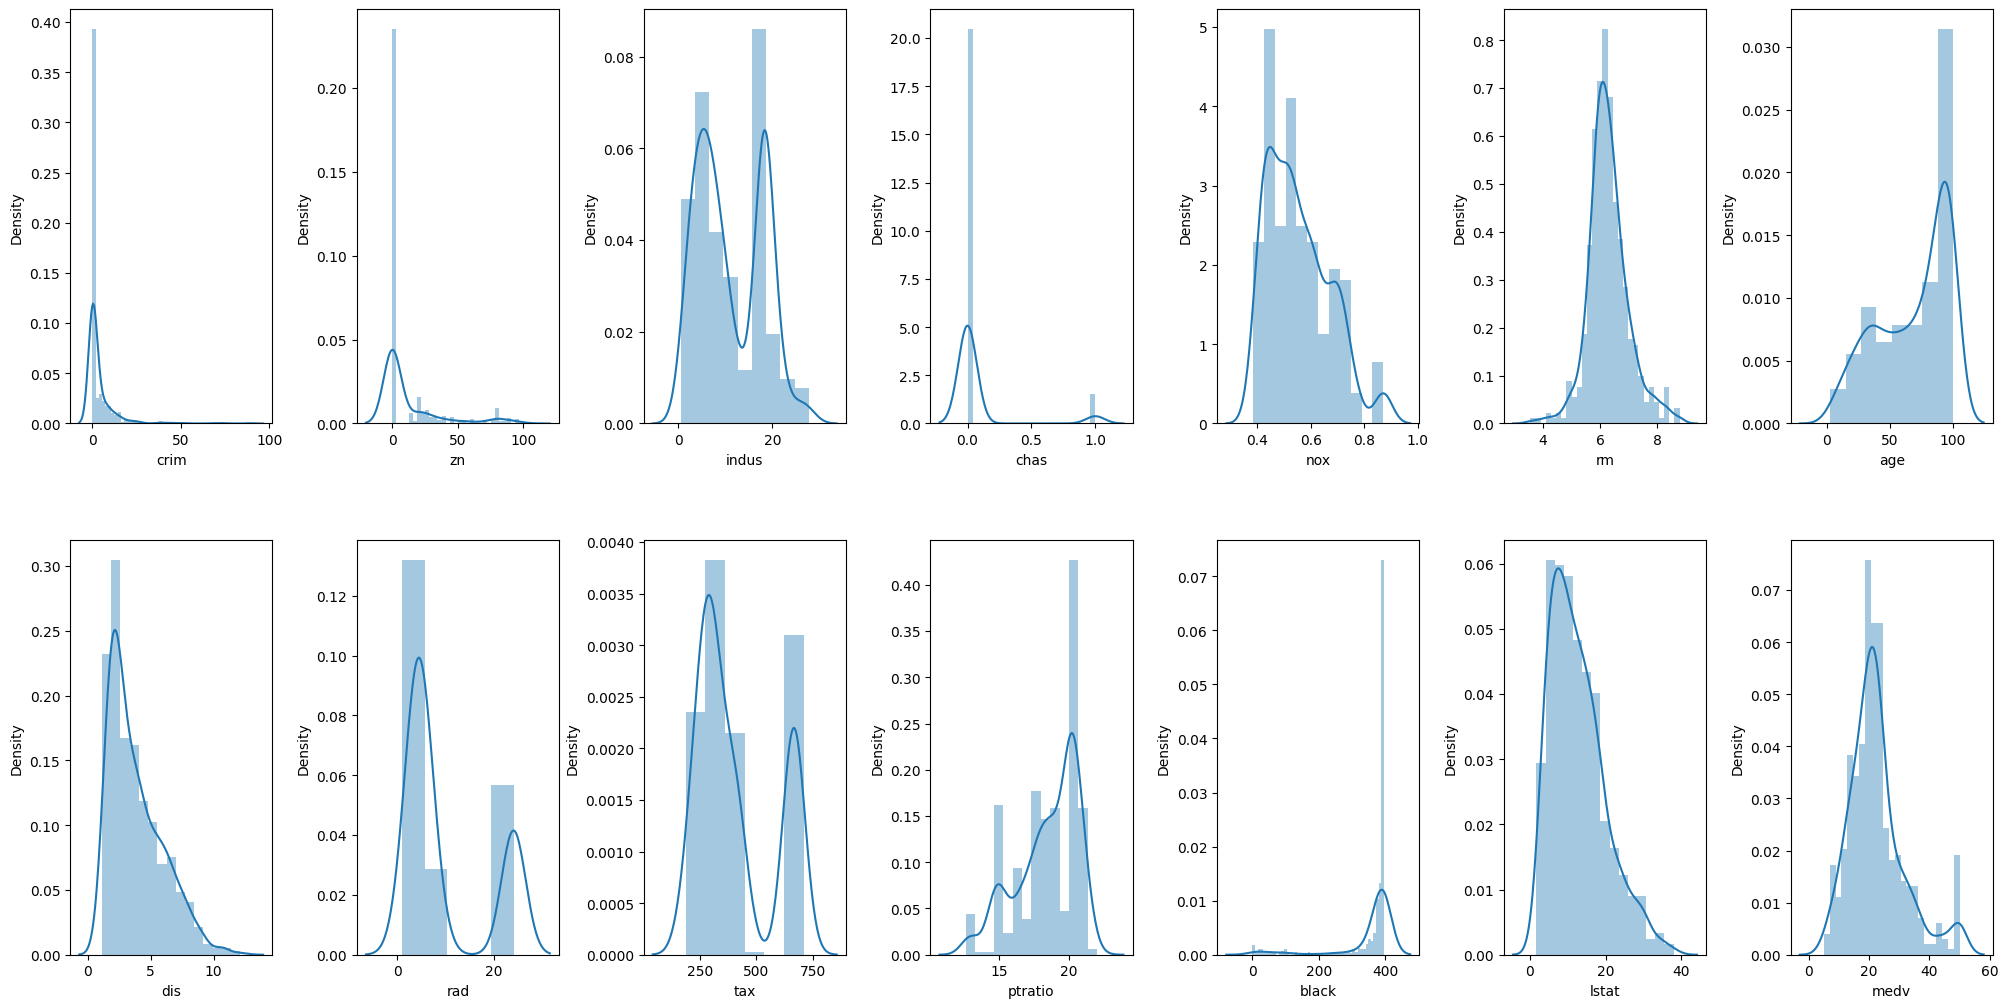

In [19]:
fig, ax = plt.subplots(ncols=7, nrows = 2, figsize = (20,10))
index = 0
ax = ax.flatten()

for col, value in housing.items():
    sns.distplot(value, ax = ax[index])
    index += 1

plt.tight_layout(pad = 0.4, w_pad = 0.5, h_pad = 5.0)

##**Min-Max Normalization**

In [20]:
cols = ['crim', 'zn', 'tax', 'black']
for col in cols:
    # find minimum and maximum of that column
    minimum = min(housing[col])
    maximum = max(housing[col])
    housing[col] = (housing[col] - minimum) / (maximum - minimum)

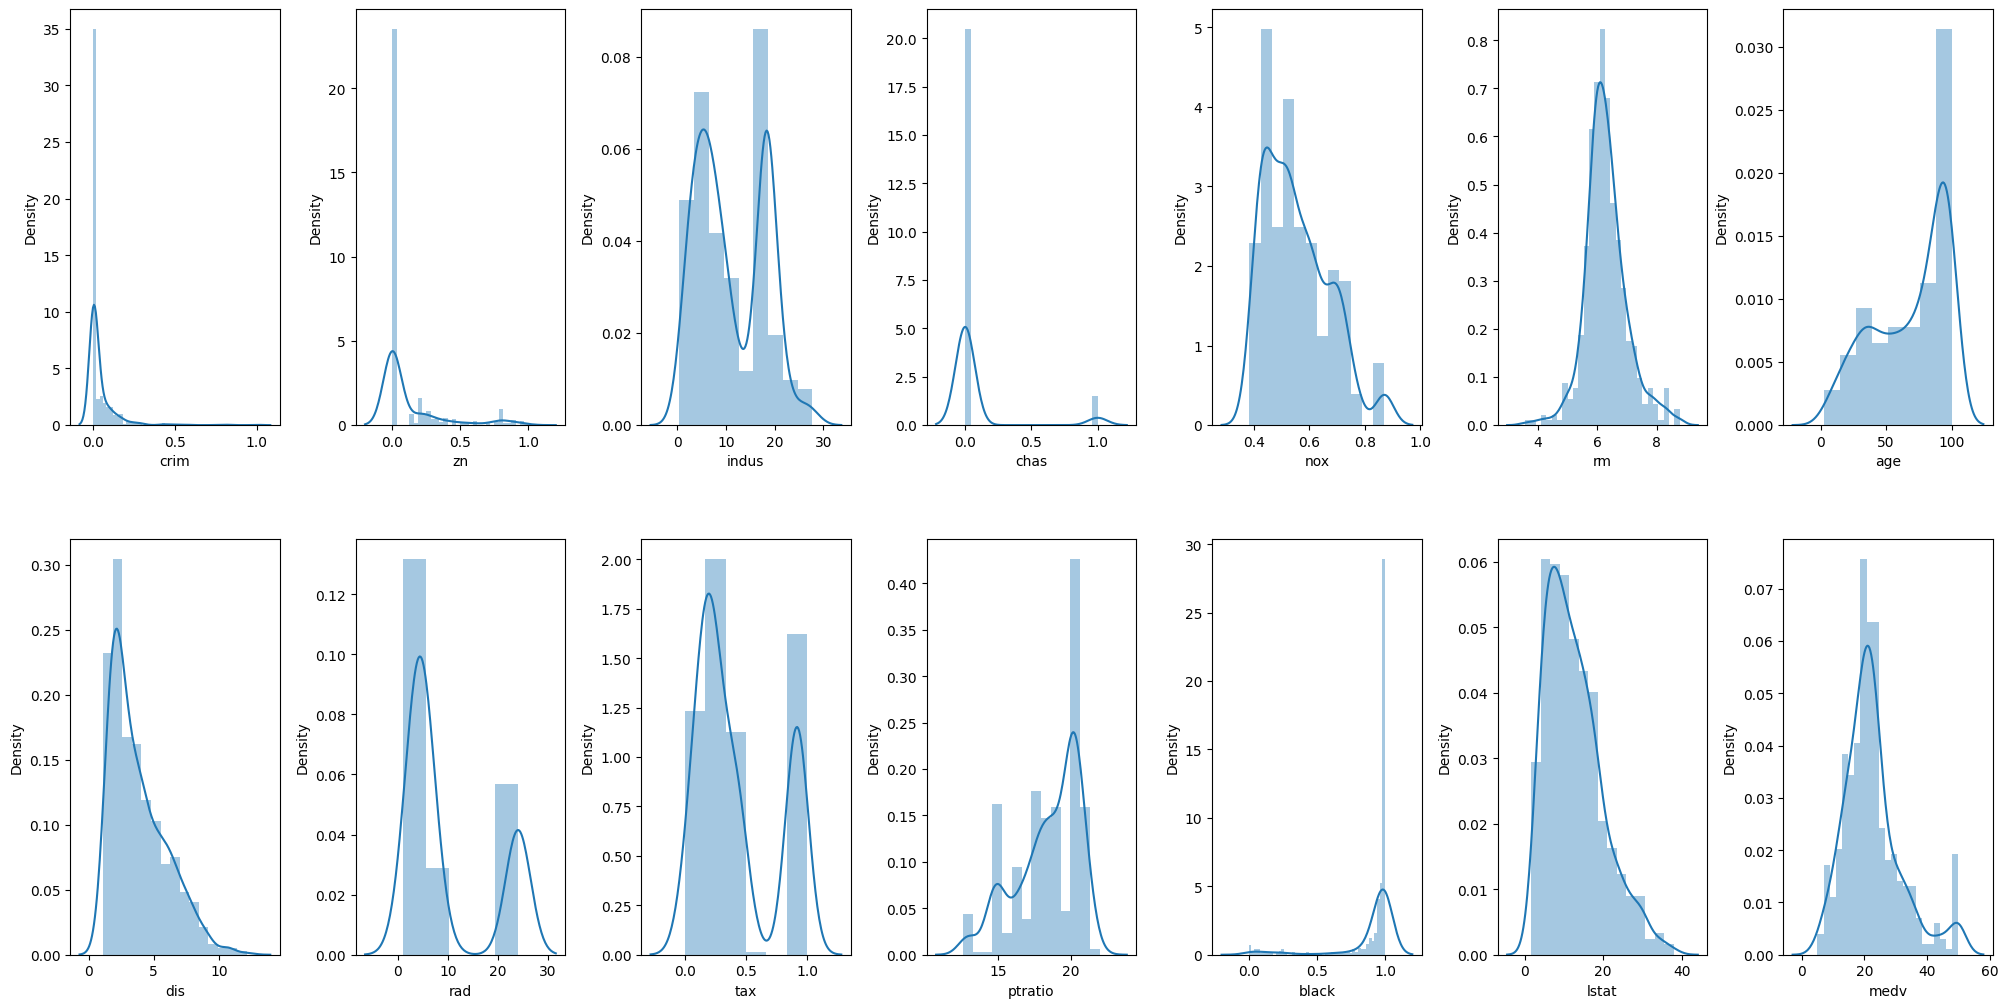

In [21]:
fig, ax = plt.subplots(ncols=7, nrows = 2, figsize = (20,10))
index = 0
ax = ax.flatten()

for col, value in housing.items():
    sns.distplot(value, ax = ax[index])
    index += 1

plt.tight_layout(pad = 0.4, w_pad = 0.5, h_pad = 5.0)

Min-Max Normalization transformed the maximum value as '1' and the minimum value as '0' to cols = ['crim', 'zn', 'tax', 'black'].

##**Standardization**

In [22]:
from sklearn import preprocessing
scalar = preprocessing.StandardScaler()

scaled_cols = scalar.fit_transform(housing[cols])
scaled_cols = pd.DataFrame(scaled_cols, columns=cols)
scaled_cols.head()

,crim,zn,tax,black
0,-0.419782,0.284830,-0.666608,0.441052
1,-0.417339,-0.487722,-0.987329,0.441052
2,-0.417342,-0.487722,-0.987329,0.396427
3,-0.416750,-0.487722,-1.106115,0.416163
4,-0.412482,-0.487722,-1.106115,0.441052


In [23]:
for col in cols:
    housing[col] = scaled_cols[col]

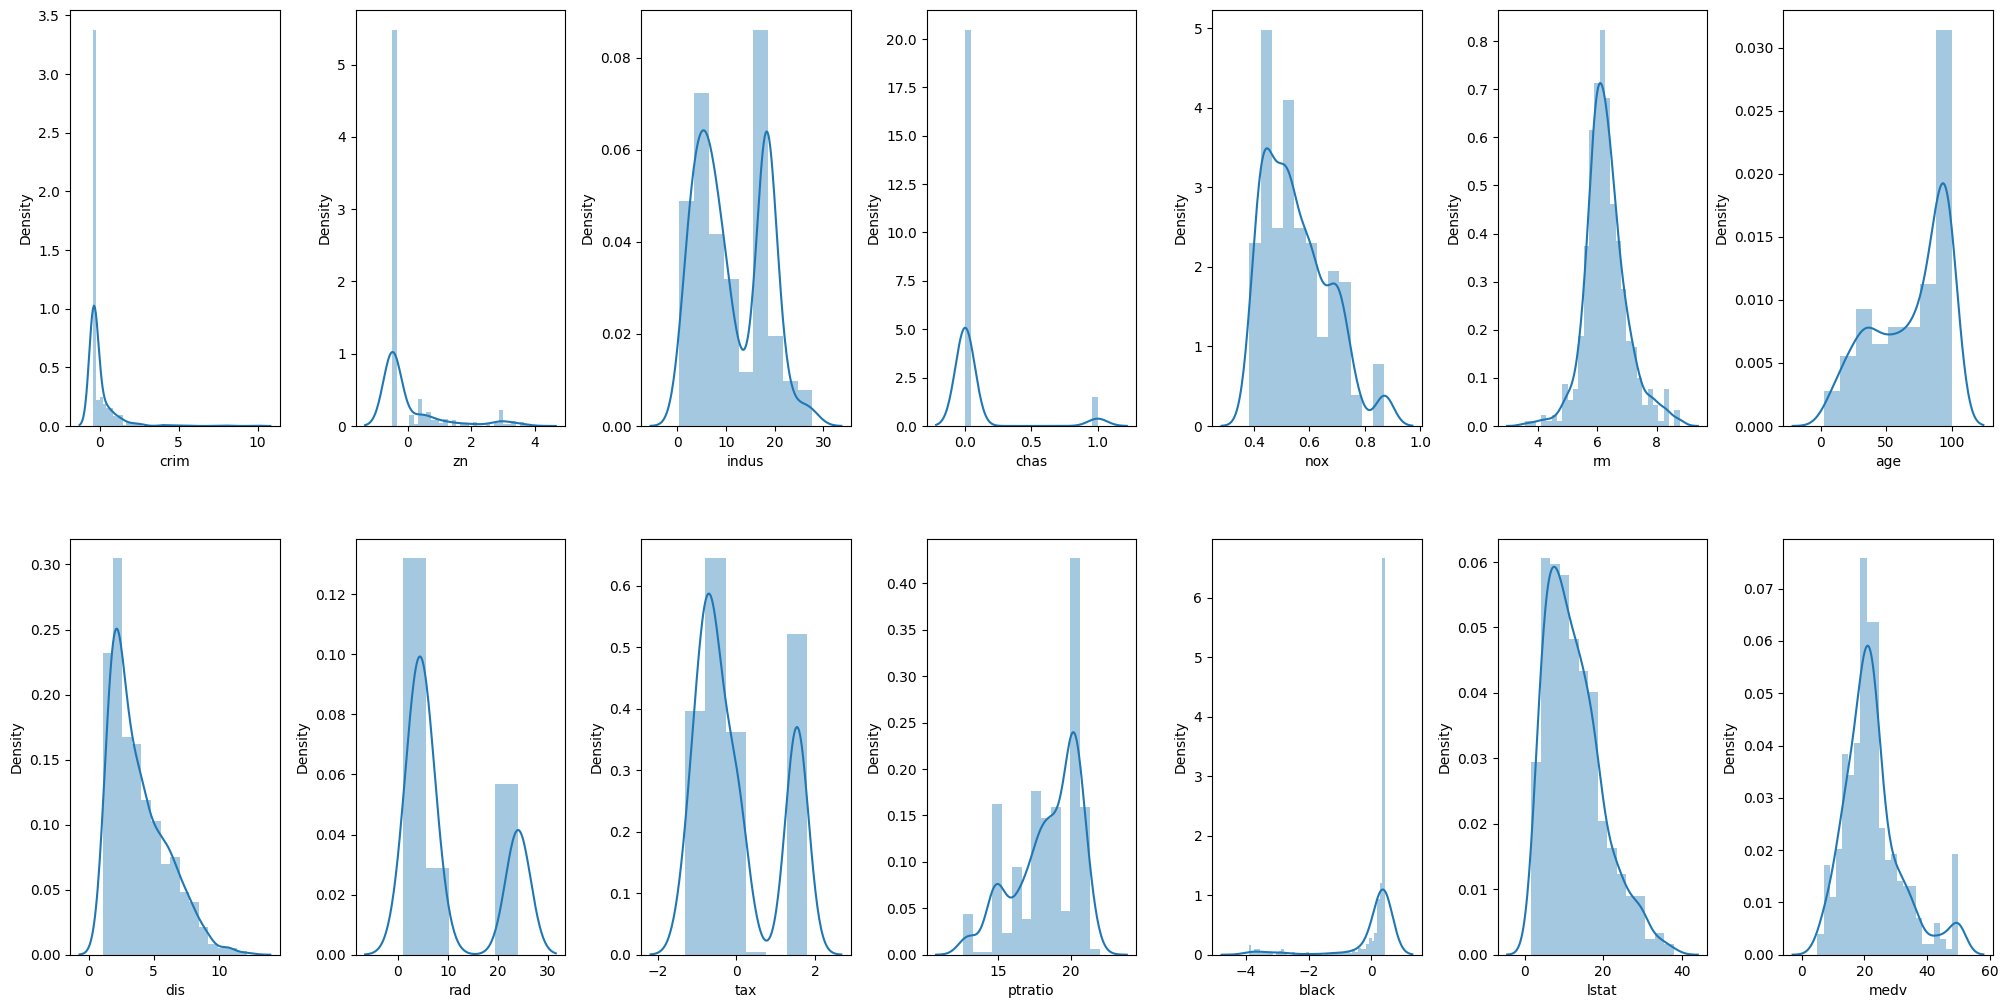

In [24]:
fig, ax = plt.subplots(ncols=7, nrows = 2, figsize = (20,10))
index = 0
ax = ax.flatten()

for col, value in housing.items():
    sns.distplot(value, ax = ax[index])
    index += 1

plt.tight_layout(pad = 0.4, w_pad = 0.5, h_pad = 5.0)

'crim', 'zn', 'tax', and 'black' does not show a perfect normal distribution.

##**Correlation Matrix**

<Axes: >

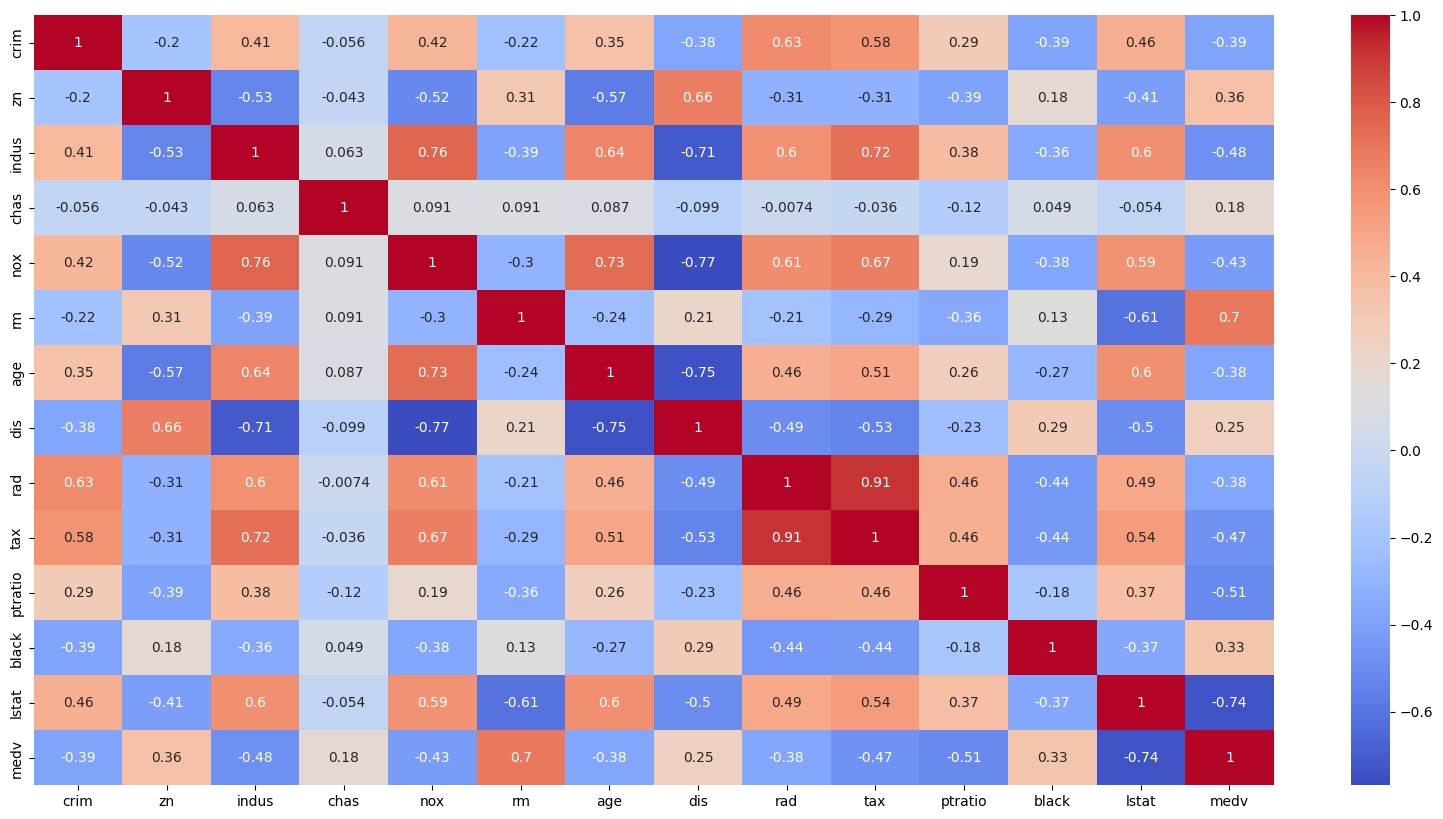

In [26]:
corr = housing.corr()
plt.figure(figsize=(20,10))
sns.heatmap(corr, annot=True, cmap='coolwarm')

The price of houses decreases with the increase in the 'lstat'. Hence it is negatively correlated.

<Axes: xlabel='lstat', ylabel='medv'>

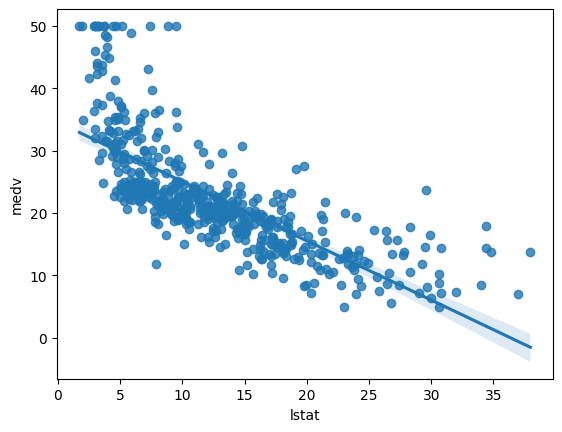

In [27]:
sns.regplot(y=housing['medv'], x=housing['lstat'])

The prices of houses increase with the increase in 'rm'. Hence it is positively correlated.

<Axes: xlabel='rm', ylabel='medv'>

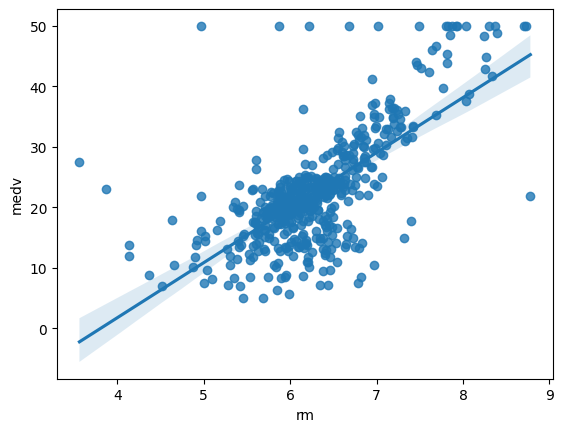

In [28]:
sns.regplot(y=housing['medv'], x=housing['rm'])

##**Input Split**

In [29]:
X = housing.drop(columns=['medv', 'rad'], axis=1)
y = housing['medv']

##**Model Training**

In [30]:
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error
def train(model, X, y):
    # train the model
    x_train, x_test, y_train, y_test = train_test_split(X, y, random_state=42)
    model.fit(x_train, y_train)

    # predict the training set
    pred = model.predict(x_test)

    # perform cross-validation
    cv_score = cross_val_score(model, X, y, scoring='neg_mean_squared_error', cv=5)
    cv_score = np.abs(np.mean(cv_score))

    print("Model Report")
    print("MSE:",mean_squared_error(y_test, pred))
    print('CV Score:', cv_score)

##**Feature Selection**

Model Report
MSE: 23.871005067364944
CV Score: 35.58136621076916


<Axes: title={'center': 'Model Coefficients'}>

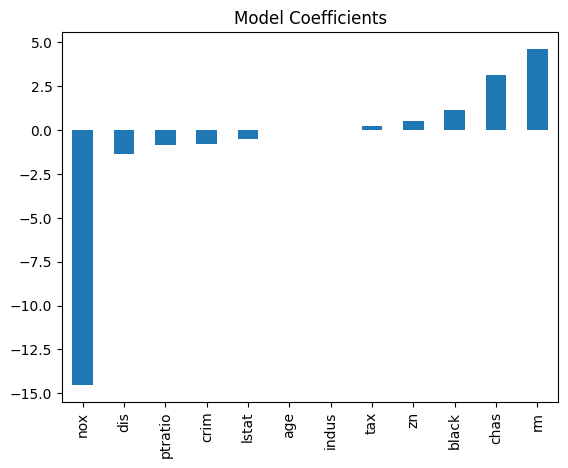

In [31]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
train(model, X, y)
coef = pd.Series(model.coef_, X.columns).sort_values()
coef.plot(kind='bar', title='Model Coefficients')

##**Decision Tree**

Model Report
MSE: 10.778661417322835
CV Score: 39.49423568239176


<Axes: title={'center': 'Feature Importance'}>

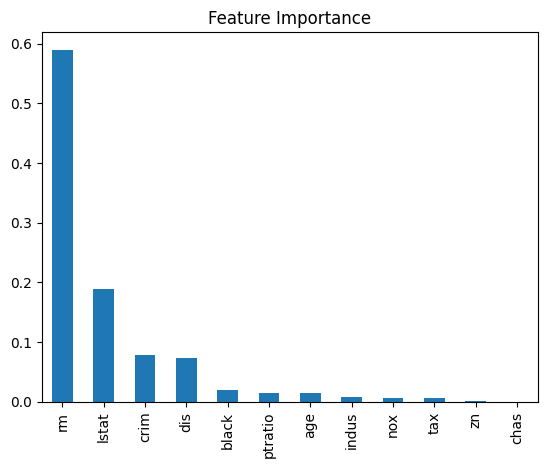

In [32]:
from sklearn.tree import DecisionTreeRegressor
model = DecisionTreeRegressor()
train(model, X, y)
coef = pd.Series(model.feature_importances_, X.columns).sort_values(ascending=False)
coef.plot(kind='bar', title='Feature Importance')

##**Random Forest**

Model Report
MSE: 10.305706968503936
CV Score: 21.47808745513491


<Axes: title={'center': 'Feature Importance'}>

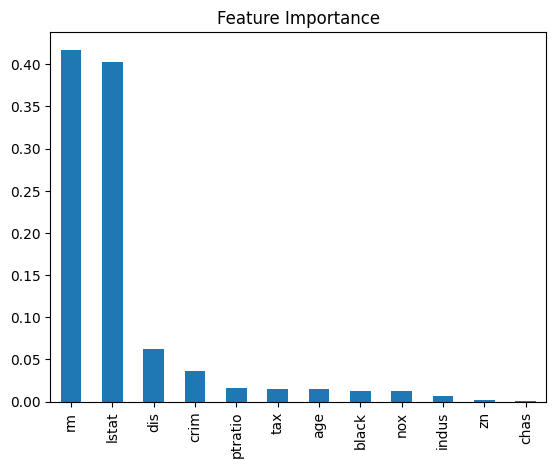

In [33]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()
train(model, X, y)
coef = pd.Series(model.feature_importances_, X.columns).sort_values(ascending=False)
coef.plot(kind='bar', title='Feature Importance')

##**Extra Trees**

Model Report
MSE: 11.160807362204725
CV Score: 20.104002365132963


<Axes: title={'center': 'Feature Importance'}>

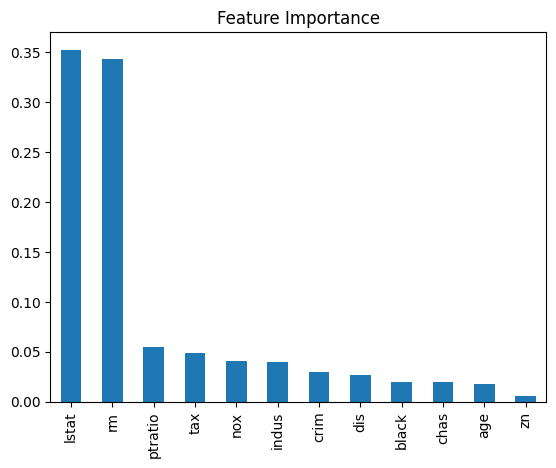

In [34]:
from sklearn.ensemble import ExtraTreesRegressor
model = ExtraTreesRegressor()
train(model, X, y)
coef = pd.Series(model.feature_importances_, X.columns).sort_values(ascending=False)
coef.plot(kind='bar', title='Feature Importance')

##**XGBoost**

Model Report
MSE: 11.681987314123807
CV Score: 26.900319661354462


<Axes: title={'center': 'Feature Importance'}>

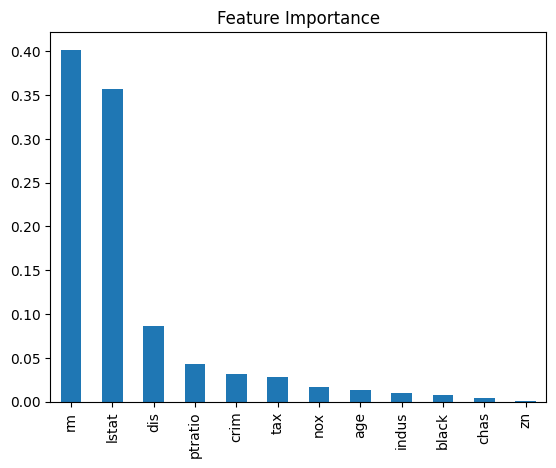

In [35]:
import xgboost as xgb
model = xgb.XGBRegressor()
train(model, X, y)
coef = pd.Series(model.feature_importances_, X.columns).sort_values(ascending=False)
coef.plot(kind='bar', title='Feature Importance')

In [36]:
X = housing.drop(['medv'], axis = 1)
y = housing['medv']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 4)

##Linear Regression

In [37]:
from sklearn.linear_model import LinearRegression

lm = LinearRegression()

lm.fit(X_train, y_train)

LinearRegression()

In [38]:
coeffcients = pd.DataFrame([X_train.columns,lm.coef_]).T
coeffcients = coeffcients.rename(columns={0: 'Attribute', 1: 'Coefficients'})
coeffcients

,Attribute,Coefficients
0,crim,-1.053247
1,zn,1.297257
2,indus,-0.008834
3,chas,4.693448
4,nox,-14.435783
5,rm,3.28008
6,age,-0.003448
7,dis,-1.552144
8,rad,0.32625
9,tax,-2.368392


In [39]:
y_pred = lm.predict(X_train)

from sklearn import metrics

print('R^2:',metrics.r2_score(y_train, y_pred))
print('Adjusted R^2:',1 - (1-metrics.r2_score(y_train, y_pred))*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1))
print('MAE:',metrics.mean_absolute_error(y_train, y_pred))
print('MSE:',metrics.mean_squared_error(y_train, y_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_train, y_pred)))

R^2: 0.7465991966746854
Adjusted R^2: 0.736910342429894
MAE: 3.0898610949711323
MSE: 19.073688703469035
RMSE: 4.367343437774162


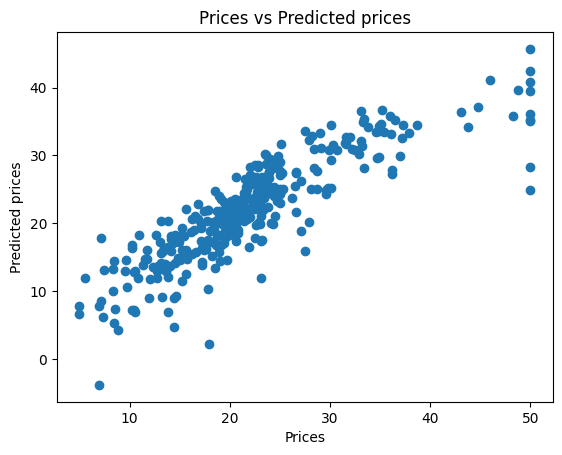

In [40]:
plt.scatter(y_train, y_pred)
plt.xlabel("Prices")
plt.ylabel("Predicted prices")
plt.title("Prices vs Predicted prices")
plt.show()

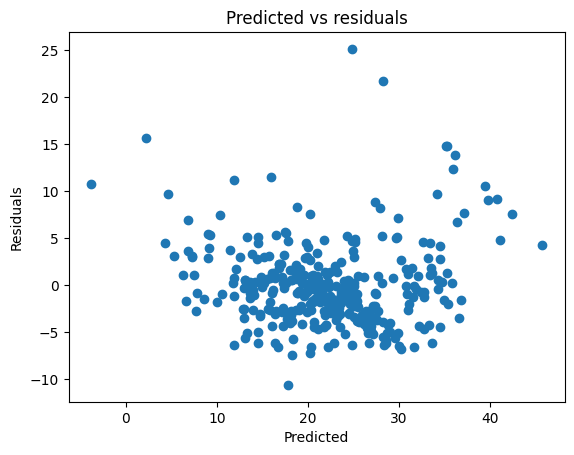

In [41]:
# Checking residuals
plt.scatter(y_pred,y_train-y_pred)
plt.title("Predicted vs residuals")
plt.xlabel("Predicted")
plt.ylabel("Residuals")
plt.show()

There is no pattern visible in this plot and values are distributed equally around zero. So Linearity assumption is satisfied

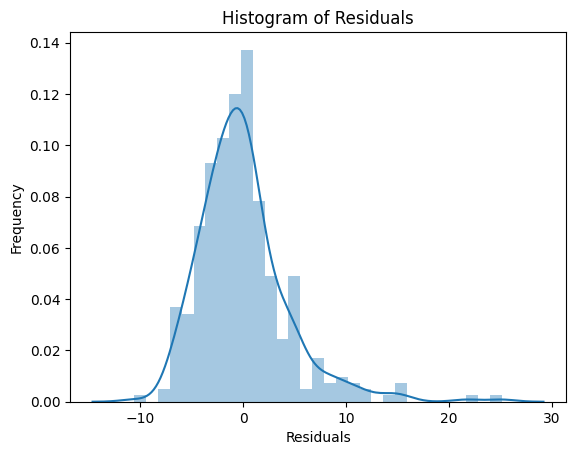

In [42]:
# Checking Normality of errors
sns.distplot(y_train-y_pred)
plt.title("Histogram of Residuals")
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.show()

Here the residuals are normally distributed. So normality assumption is satisfied

In [43]:
#for test data
y_test_pred = lm.predict(X_test)

acc_linreg = metrics.r2_score(y_test, y_test_pred)
print('R^2:', acc_linreg)
print('Adjusted R^2:',1 - (1-metrics.r2_score(y_test, y_test_pred))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))
print('MAE:',metrics.mean_absolute_error(y_test, y_test_pred))
print('MSE:',metrics.mean_squared_error(y_test, y_test_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

R^2: 0.7121818377409187
Adjusted R^2: 0.6850685326005705
MAE: 3.859005592370742
MSE: 30.053993307124216
RMSE: 5.482152251362982


In [44]:
from sklearn.ensemble import RandomForestRegressor

reg = RandomForestRegressor()

# Train the model using the training sets
reg.fit(X_train, y_train)

y_pred = reg.predict(X_train)

print('R^2:',metrics.r2_score(y_train, y_pred))
print('Adjusted R^2:',1 - (1-metrics.r2_score(y_train, y_pred))*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1))
print('MAE:',metrics.mean_absolute_error(y_train, y_pred))
print('MSE:',metrics.mean_squared_error(y_train, y_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_train, y_pred)))

R^2: 0.9796275912323156
Adjusted R^2: 0.9788486461911983
MAE: 0.830940677966102
MSE: 1.533448110169493
RMSE: 1.2383247191950475


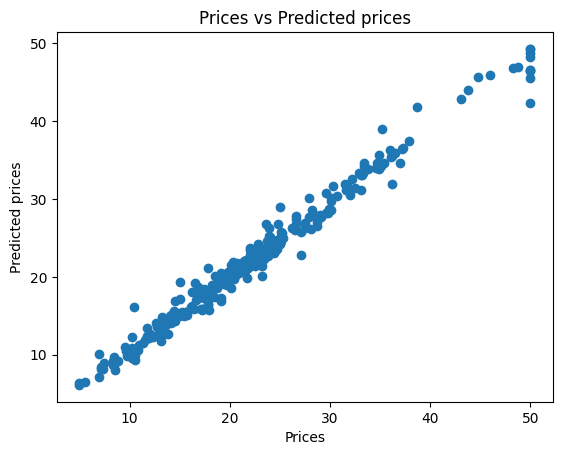

In [45]:
plt.scatter(y_train, y_pred)
plt.xlabel("Prices")
plt.ylabel("Predicted prices")
plt.title("Prices vs Predicted prices")
plt.show()

In [46]:
# Predicting Test data with the model
y_test_pred = reg.predict(X_test)

acc_rf = metrics.r2_score(y_test, y_test_pred)
print('R^2:', acc_rf)
print('Adjusted R^2:',1 - (1-metrics.r2_score(y_test, y_test_pred))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))
print('MAE:',metrics.mean_absolute_error(y_test, y_test_pred))
print('MSE:',metrics.mean_squared_error(y_test, y_test_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

R^2: 0.8334760681541741
Adjusted R^2: 0.8177890310962339
MAE: 2.4896447368421044
MSE: 17.388441
RMSE: 4.169944963665587


In [47]:
from xgboost import XGBRegressor

reg = XGBRegressor()

# Train the model using the training sets
reg.fit(X_train, y_train)

y_pred = reg.predict(X_train)
# Model Evaluation
print('R^2:',metrics.r2_score(y_train, y_pred))
print('Adjusted R^2:',1 - (1-metrics.r2_score(y_train, y_pred))*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1))
print('MAE:',metrics.mean_absolute_error(y_train, y_pred))
print('MSE:',metrics.mean_squared_error(y_train, y_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_train, y_pred)))

R^2: 0.9999984393569055
Adjusted R^2: 0.9999983796852577
MAE: 0.0075487993531308095
MSE: 0.00011747090053634414
RMSE: 0.010838399353056897


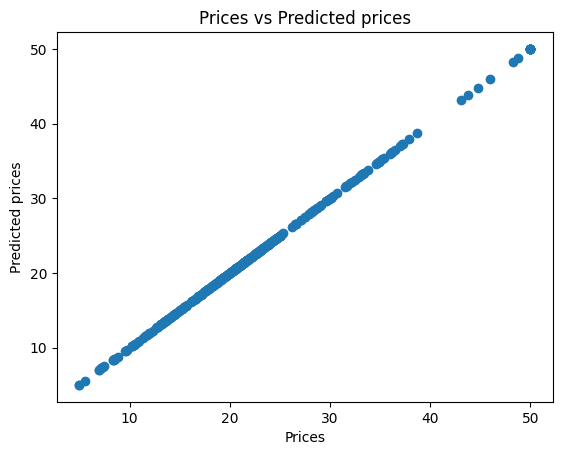

In [48]:
plt.scatter(y_train, y_pred)
plt.xlabel("Prices")
plt.ylabel("Predicted prices")
plt.title("Prices vs Predicted prices")
plt.show()

In [50]:
#Predicting Test data with the model
y_test_pred = reg.predict(X_test)
# Model Evaluation
acc_xgb = metrics.r2_score(y_test, y_test_pred)
print('R^2:', acc_xgb)
print('Adjusted R^2:',1 - (1-metrics.r2_score(y_test, y_test_pred))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))
print('MAE:',metrics.mean_absolute_error(y_test, y_test_pred))
print('MSE:',metrics.mean_squared_error(y_test, y_test_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

R^2: 0.876198092300946
Adjusted R^2: 0.8645355937495859
MAE: 2.3247050780999032
MSE: 12.927404150566876
RMSE: 3.5954699485000394


In [51]:
# Creating scaled set to be used in model to improve our results
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

from sklearn import svm

# Create a SVM Regressor
reg = svm.SVR()

reg.fit(X_train, y_train)


SVR()

R^2: 0.6419097248941195
Adjusted R^2: 0.628218037904777
MAE: 2.9361501059460293
MSE: 26.953752101332935
RMSE: 5.191700309275655


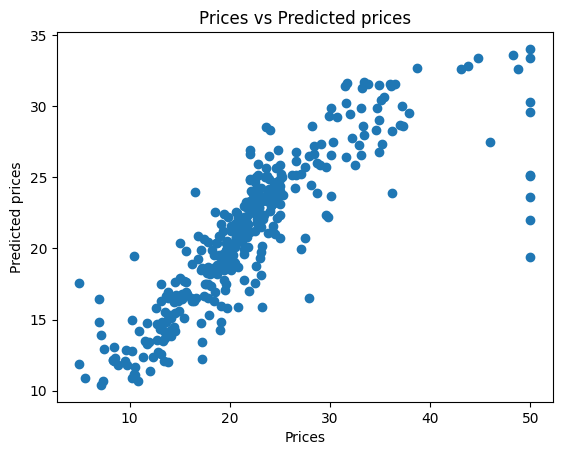

In [52]:
# Model prediction on train data
y_pred = reg.predict(X_train)
# Model Evaluation
print('R^2:',metrics.r2_score(y_train, y_pred))
print('Adjusted R^2:',1 - (1-metrics.r2_score(y_train, y_pred))*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1))
print('MAE:',metrics.mean_absolute_error(y_train, y_pred))
print('MSE:',metrics.mean_squared_error(y_train, y_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_train, y_pred)))

plt.scatter(y_train, y_pred)
plt.xlabel("Prices")
plt.ylabel("Predicted prices")
plt.title("Prices vs Predicted prices")
plt.show()

In [53]:
# Predicting Test data with the model
y_test_pred = reg.predict(X_test)
# Model Evaluation
acc_svm = metrics.r2_score(y_test, y_test_pred)
print('R^2:', acc_svm)
print('Adjusted R^2:',1 - (1-metrics.r2_score(y_test, y_test_pred))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))
print('MAE:',metrics.mean_absolute_error(y_test, y_test_pred))
print('MSE:',metrics.mean_squared_error(y_test, y_test_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

R^2: 0.5900158460478174
Adjusted R^2: 0.5513941503856553
MAE: 3.7561453553021678
MSE: 42.81057499010247
RMSE: 6.542979060802691


In [64]:
models = pd.DataFrame({
    'Model': ['Linear Regression', 'Random Forest', 'XGBoost', 'Support Vector Machines'],
    'R-squared Score': [acc_linreg*100, acc_rf*100, acc_xgb*100, acc_svm*100]})
models.sort_values(by='R-squared Score', ascending=False)

,Model,R-squared Score
2,XGBoost,87.619809
1,Random Forest,83.347607
0,Linear Regression,71.218184
3,Support Vector Machines,59.001585


XGBoost works with best accuracy.

In [65]:
!jupyter nbconvert --to html /House1.ipynb

[NbConvertApp] Converting notebook /House1.ipynb to html
[NbConvertApp] Writing 2245516 bytes to /House1.html
